# **Creating Choropleth Map from Points**

## **01. Importing Required Libraries**

In [150]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **02. Setting Up the Current Working Directory**

In [151]:
# Checking the current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets'

In [152]:
# Changing the current working directory
file_path = r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets"
os.chdir(file_path)
# Checking the new current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets'

In [153]:
# Defining the CSV and Shapefile paths
csv_path = file_path + "\\CSVs"
shp_path = file_path + "\\Shapefiles"

## **03. Reading the Data**

In [154]:
# Reading the us_county data using geopandas
us_county = gpd.read_file(shp_path + "\\tl_2022_us_county.zip")
us_county.head()

STATEFP COUNTYFP  COUNTYNS  GEOID       NAME          NAMELSAD LSAD CLASSFP  \
0      31      039  00835841  31039     Cuming     Cuming County   06      H1   
1      53      069  01513275  53069  Wahkiakum  Wahkiakum County   06      H1   
2      35      011  00933054  35011    De Baca    De Baca County   06      H1   
3      31      109  00835876  31109  Lancaster  Lancaster County   06      H1   
4      31      129  00835886  31129   Nuckolls   Nuckolls County   06      H1   

   MTFCC  CSAFP  CBSAFP  METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
0  G4020    NaN     NaN       NaN        A  1477644346  10691216  +41.9158651   
1  G4020    NaN     NaN       NaN        A   680980770  61564427  +46.2946377   
2  G4020    NaN     NaN       NaN        A  6016818946  29090018  +34.3592729   
3  G4020    NaN     NaN       NaN        A  2169272978  22847034  +40.7835474   
4  G4020    NaN     NaN       NaN        A  1489645185   1718484  +40.1764918   

       INTPTLON                                           geometry  
0  -096.7885168  POLYGON ((-96.55515 41.91587, -96.55515 41.914...  
1  -123.4244583  POLYGON ((-123.72755 46.26449, -123.72755 46.2...  
2  -104.3686961  POLYGON ((-104.89337 34.08894, -104.89337 34.0...  
3  -096.6886584  POLYGON ((-96.68493 40.52330, -96.69219 40.523...  
4  -098.0468422  POLYGON ((-98.27370 40.11840, -98.27374 40.122...

In [155]:
# Reading the California housing data
housing = pd.read_csv(csv_path + "\\housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## **04. Prepairing the Dataset**


In [156]:
# Checking the CRS of the us_county data
us_county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [157]:
# Changing the CRS from NAD83 to WGS84
us_county = us_county.to_crs(4326)
# Checking the new CRS of the data
us_county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [158]:
# Subsetting the US Counties that belong to California state
# STATFP of California = 06
ca_county = us_county.loc[:,:][us_county["STATEFP"]=="06"]
# Checking the ca_county dataframe
ca_county.head()

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD  \
8        06      091  00277310  06091         Sierra         Sierra County   
324      06      067  00277298  06067     Sacramento     Sacramento County   
328      06      083  00277306  06083  Santa Barbara  Santa Barbara County   
345      06      009  01675885  06009      Calaveras      Calaveras County   
393      06      111  00277320  06111        Ventura        Ventura County   

    LSAD CLASSFP  MTFCC  CSAFP  CBSAFP  METDIVFP FUNCSTAT       ALAND  \
8     06      H1  G4020    NaN     NaN       NaN        A  2468694582   
324   06      H1  G4020    NaN     NaN       NaN        A  2500063008   
328   06      H1  G4020    NaN     NaN       NaN        A  7080858282   
345   06      H1  G4020    NaN     NaN       NaN        A  2641837360   
393   06      H1  G4020    NaN     NaN       NaN        A  4767585001   

         AWATER     INTPTLAT      INTPTLON  \
8      23299110  +39.5769252  -120.5219926   
324    75323438  +38.4501363  -121.3443291   
328  2729215451  +34.5366774  -120.0383645   
345    43789489  +38.1910682  -120.5541065   
393   947376202  +34.3587477  -119.1331453   

                                              geometry  
8    POLYGON ((-120.55587 39.50874, -120.55614 39.5...  
324  POLYGON ((-121.43991 38.25553, -121.44002 38.2...  
328  MULTIPOLYGON (((-120.58227 34.10752, -120.5790...  
345  POLYGON ((-120.63180 38.34603, -120.63066 38.3...  
393  MULTIPOLYGON (((-119.63607 33.28071, -119.6347...

In [159]:
# Printing the housing.csv data
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [160]:
# Converting the housing dataframe into geodataframe
housing_gdf = gpd.GeoDataFrame(housing, 
                               crs=4326, 
                               geometry=gpd.points_from_xy(housing.longitude, housing.latitude))
# Checking the geodataframe
housing_gdf.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

                      geometry  
0  POINT (-122.23000 37.88000)  
1  POINT (-122.22000 37.86000)  
2  POINT (-122.24000 37.85000)  
3  POINT (-122.25000 37.85000)  
4  POINT (-122.25000 37.85000)

In Geopandas, spatial join and aggregation are powerful operations used to combine geospatial datasets based on their spatial relationships and perform calculations or summaries on the resulting joined data. Let's explore each of these operations:

**Spatial Join:**<br>
Spatial join is the process of combining two or more geospatial datasets based on their spatial relationships. It involves linking the attributes of one dataset to another dataset based on the spatial proximity or overlap of their geometries. The resulting joined dataset contains attributes from both datasets.

In Geopandas, the sjoin() function is used to perform a spatial join. It takes two GeoDataFrames as input and joins them based on a specified spatial relationship, such as "intersects," "contains," or "within." The function returns a new GeoDataFrame with the attributes from both input datasets.

* **Parameters:**<br>
1. **how:** This parameter determines how the spatial join is performed. The available options are:
   
   * "inner" (default): Only the intersecting or overlapping geometries between the two datasets are retained in the joined result.
   * "left": All features from the left GeoDataFrame are kept, and attributes from the right GeoDataFrame are added to the resulting joined dataset based on the spatial relationship.
   * "right": All features from the right GeoDataFrame are kept, and attributes from the left GeoDataFrame are added to the resulting joined dataset based on the spatial relationship.
   * "outer": All features from both GeoDataFrames are retained, and attributes are added based on the spatial relationship. Non-overlapping features will have missing attribute values.<br>


2. **op:** This parameter specifies the spatial relationship used for the join. The available options are:

   * "intersects" (default): Joins geometries if they intersect or have any spatial overlap.
   * "contains": Joins geometries if one completely contains the other.
   * "within": Joins geometries if one is completely within the other.
   * "touches": Joins geometries if they share a common boundary but do not overlap.

In [161]:
# Applying Spatial Join between ca_county and housing_gdf
county_housing_sj = gpd.sjoin(ca_county, housing_gdf, how="left", op="contains")
# Checking the spatially joined dataframe
county_housing_sj.head()

STATEFP COUNTYFP  COUNTYNS  GEOID    NAME       NAMELSAD LSAD CLASSFP  \
8      06      091  00277310  06091  Sierra  Sierra County   06      H1   
8      06      091  00277310  06091  Sierra  Sierra County   06      H1   
8      06      091  00277310  06091  Sierra  Sierra County   06      H1   
8      06      091  00277310  06091  Sierra  Sierra County   06      H1   
8      06      091  00277310  06091  Sierra  Sierra County   06      H1   

   MTFCC  CSAFP  ...  longitude  latitude housing_median_age  total_rooms  \
8  G4020    NaN  ...    -120.51     39.52               26.0       2286.0   
8  G4020    NaN  ...    -120.23     39.56               14.0       1781.0   
8  G4020    NaN  ...    -120.48     39.66               32.0       1516.0   
8  G4020    NaN  ...    -120.24     39.67               52.0        296.0   
8  G4020    NaN  ...    -120.24     39.67               40.0        690.0   

   total_bedrooms population households median_income  median_house_value  \
8           444.0      498.0      216.0        2.0650             96100.0   
8           346.0      734.0      287.0        2.4600             93000.0   
8           289.0      304.0      131.0        1.8839             71000.0   
8            63.0      143.0       56.0        3.6250             68600.0   
8           129.0      305.0      110.0        2.3625             62500.0   

   ocean_proximity  
8           INLAND  
8           INLAND  
8           INLAND  
8           INLAND  
8           INLAND  

[5 rows x 29 columns]

In [162]:
# Selecting required columns only
county_housing_sj = county_housing_sj[["GEOID", "NAME", "median_house_value", "geometry"]]

**Aggregation:**<br>
Aggregation in Geopandas involves summarizing or calculating statistics on a group of features based on a specific spatial unit. It allows you to aggregate or dissolve geometries together and compute summary statistics for the combined features.

The dissolve() function in Geopandas is commonly used for aggregation. It combines geometries that share a common attribute value and calculates summary statistics for the grouped features. You can specify which attribute to dissolve by, and the function can compute various statistics, such as the sum, mean, maximum, minimum, or count of a specific attribute

In [163]:
# Aggregating the rows by GEOID
county_housing_agg = county_housing_sj.dissolve(by=["GEOID"], aggfunc="mean")

In [164]:
# Checking the aggregated geodataframe
county_housing_agg.head()

geometry  median_house_value
GEOID                                                                       
06001  POLYGON ((-122.34600 37.89000, -122.33826 37.8...       208539.459566
06003  POLYGON ((-120.07324 38.70116, -120.07302 38.7...       118700.000000
06005  POLYGON ((-121.02750 38.50253, -121.02745 38.5...       117146.428571
06007  POLYGON ((-122.06125 39.84810, -122.05921 39.8...        89611.538462
06009  POLYGON ((-120.62869 38.35201, -120.62862 38.3...       107893.750000

In [165]:
# Manipulating the aggregated data
county_housing_agg.reset_index(inplace=True)
county_housing_agg = county_housing_agg.loc[:, ["GEOID", "median_house_value", "geometry"]]
# Checking the manipulated aggregated dataframe
county_housing_agg.head()

GEOID  median_house_value  \
0  06001       208539.459566   
1  06003       118700.000000   
2  06005       117146.428571   
3  06007        89611.538462   
4  06009       107893.750000   

                                            geometry  
0  POLYGON ((-122.34600 37.89000, -122.33826 37.8...  
1  POLYGON ((-120.07324 38.70116, -120.07302 38.7...  
2  POLYGON ((-121.02750 38.50253, -121.02745 38.5...  
3  POLYGON ((-122.06125 39.84810, -122.05921 39.8...  
4  POLYGON ((-120.62869 38.35201, -120.62862 38.3...

## **05. Spatial Data Visualization**

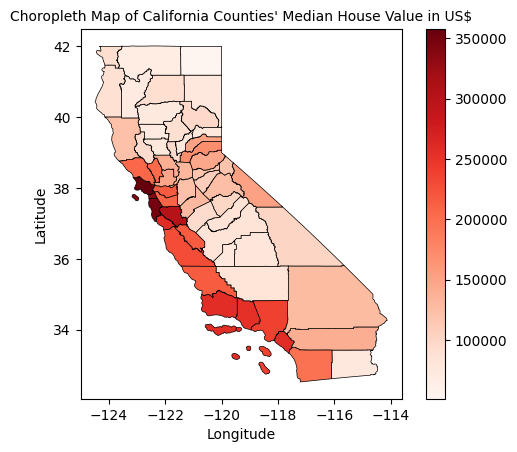

In [166]:
# Plotting a choropleth map using geopandas
axes = county_housing_agg.plot(column="median_house_value",
                               cmap="Reds",
                               edgecolor="black",
                               linewidth=0.5,
                               legend=True)
axes.set_xlabel("Longitude")
axes.set_ylabel("Latitude")
axes.set_title("Choropleth Map of California Counties' Median House Value in US$")
axes.title.set_size(10)

**Geoviews:**
Geoviews is a Python library that is built on top of the powerful visualization library called HoloViews. It provides a high-level interface for creating interactive and declarative visualizations of geospatial data. Geoviews is designed to simplify the process of working with complex geospatial datasets and enables easy exploration and analysis of geographic information.

Key features and capabilities of Geoviews include:

* **Declarative syntax:** Geoviews allows you to define visualizations using a concise and declarative syntax, which makes it easy to create complex plots with minimal code. You can specify the data, visual attributes, and other parameters using a chainable syntax.

* **Seamless integration:** Geoviews seamlessly integrates with popular geospatial libraries such as GeoPandas, Cartopy, and Bokeh. It can ingest data from different formats and sources, including shapefiles, GeoJSON, and raster datasets.

* **Interactive visualizations:** Geoviews supports interactive exploration and visualization of geospatial data. It leverages the interactivity features of HoloViews and Bokeh, allowing you to zoom, pan, and explore the data with tooltips, hover effects, and interactive widgets.

* **Dynamic overlays:** Geoviews enables the creation of dynamic overlays, where multiple layers of geospatial data can be combined and visualized together. This makes it easy to overlay different data types, such as points, lines, polygons, and raster images.

* **Geospatial projections:** Geoviews supports various map projections, allowing you to display and transform geographic data in different coordinate reference systems (CRS). It provides a consistent interface for working with different projections, making it easy to switch between them.

* **Geospatial operations:** Geoviews provides functionality for performing common geospatial operations, such as spatial aggregation, spatial joins, and spatial filtering. These operations can be used to analyze and process geospatial data effectively.

In [167]:
# Importing geoviews library
import geoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
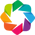

:Polygons   [Longitude,Latitude]   (median_house_value,GEOID)

In [168]:
# Plotting an interactive choropleth map using geoviews
geoviews.extension("bokeh")
choropleth = geoviews.Polygons(data=county_housing_agg, vdims=["median_house_value", "GEOID"])
choropleth.options(height=600,
                   width=500,
                   title="Choropleth Map of California Counties' Median House Value in US$",
                   tools=["hover"],
                   cmap="Reds",
                   colorbar=True,
                   colorbar_position = "bottom")